In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import minimize

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f,2)

In [4]:
res.x

array([2.99999999])

In [5]:
f = lambda x:(x[0]-1)**2 + (x[1]-2.5)**2
cons = ({'type':'ineq','fun':lambda x:x[0]-2*x[1]+2},
         {'type':'ineq','fun':lambda x:x[0]-2*x[1]+6},
         {'type':'ineq','fun':lambda x:x[0]-2*x[1]+2}      
        )
bnds = ((0,None),(0,None))
res = minimize(f,(2,0),bounds=bnds,constraints=cons)

In [6]:
res.x

array([1.4, 1.7])

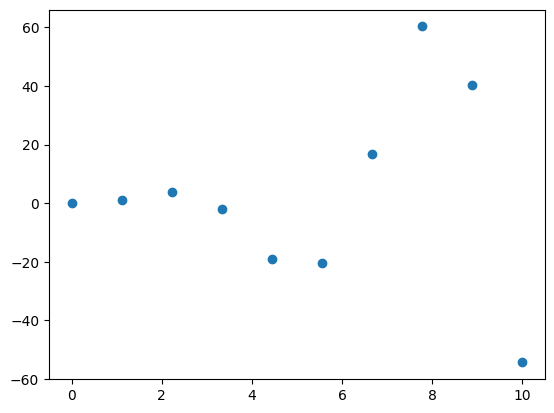

In [7]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

mau tau nilai antara

In [8]:
from scipy.interpolate import interp1d

In [9]:
f = interp1d(x,y,kind='cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

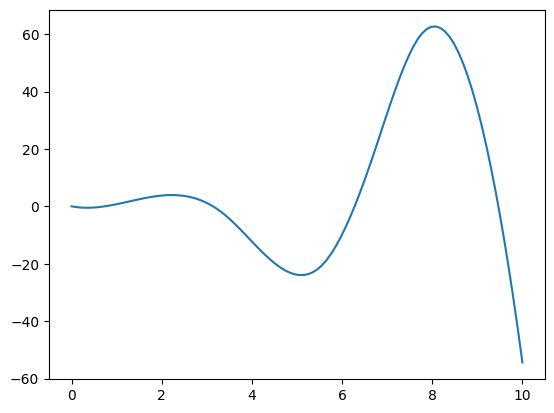

In [10]:
plt.plot(x_dense,y_dense)

# Curve Fitting

In [11]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2

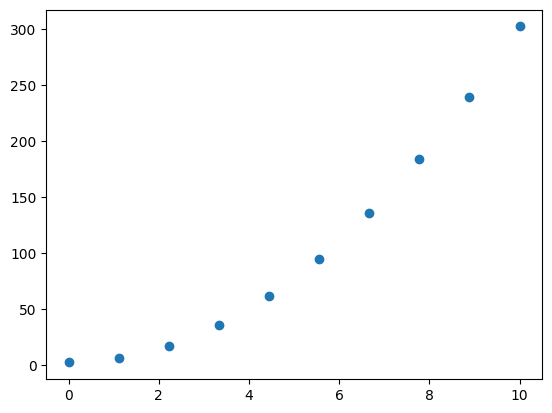

In [12]:
plt.scatter(x_data,y_data)

Fit data to the curve $y = ax^2 + b$.The main goal here is determine the values of a and b

In [13]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2 + b

popt , pcov = curve_fit(func,x_data,y_data,p0=(1,1))

find the natural frequency of oscillation $\omega$ for the spring

In [14]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

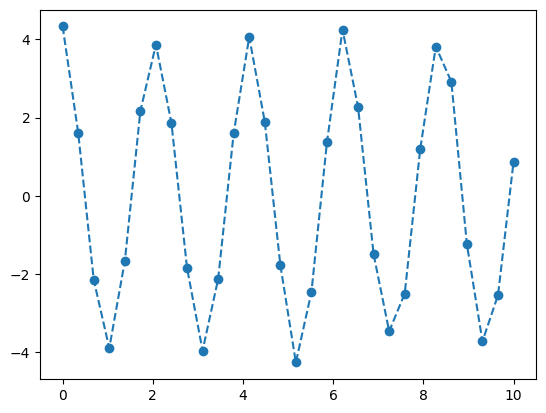

In [15]:
plt.plot(t_data,y_data,'o--')

$\omega = 2 \pi$ , $f = 1/T$,and $T \approx 2$  seconds.Thus good intial guess is :

$\omega = 2\pi(1/2) = \pi$
$\newline$
$A = 4$
$\newline$
$\phi = 0$

In [16]:
def func(x,A,w,phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func,t_data,y_data,p0=(4,np.pi,0))


In [17]:
popt

array([3.94836219, 2.99899521, 0.1041135 ])

In [18]:
A,w,phi = popt

In [19]:
t = np.linspace(0,10,100)
y = func(t,A,w,phi)


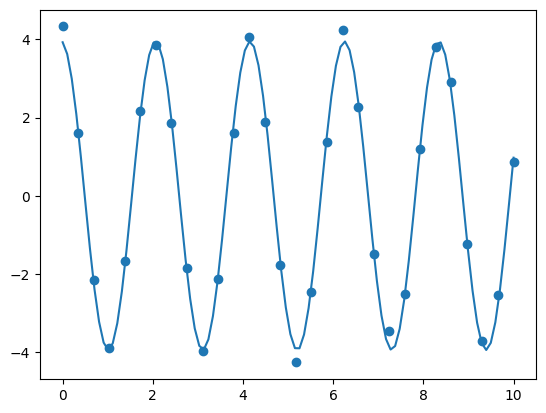

In [20]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

The parameters

In [21]:
popt

array([3.94836219, 2.99899521, 0.1041135 ])

The estimated error on the parameters

In [22]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575703])

# Special Functions
Legendre Polynomials $P_1(x):$ satisfy $(1-x^2)y''-2xy'+l(l+1)y = 0$ 
$\newline$
$\space$
The angular component of the spherical Schrodinger Equation Which non-infinite solutions

In [23]:
from scipy.special import legendre

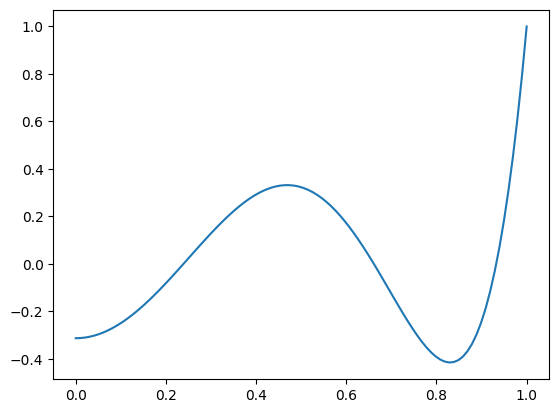

In [24]:
x = np.linspace(0,1,100)
plt.plot(x,legendre(6)(x))
plt.show()

In [25]:
legendre(6)(x)

array([-0.3125    , -0.31183063, -0.30982498, -0.30649042, -0.30183921,
       -0.29588849, -0.28866022, -0.28018113, -0.27048269, -0.259601  ,
       -0.24757672, -0.234455  , -0.22028534, -0.20512149, -0.18902132,
       -0.17204669, -0.1542633 , -0.13574052, -0.1165512 , -0.09677155,
       -0.07648089, -0.05576147, -0.03469823, -0.01337862,  0.00810769,
        0.02966902,  0.05121194,  0.07264159,  0.09386188,  0.11477587,
        0.135286  ,  0.15529446,  0.17470346,  0.19341564,  0.21133433,
        0.228364  ,  0.24441054,  0.25938173,  0.27318756,  0.28574066,
        0.29695673,  0.30675493,  0.31505837,  0.32179447,  0.32689553,
        0.3302991 ,  0.33194851,  0.33179336,  0.32979001,  0.3259021 ,
        0.32010106,  0.31236669,  0.30268763,  0.29106199,  0.27749789,
        0.26201403,  0.24464031,  0.22541838,  0.20440232,  0.18165921,
        0.15726978,  0.13132908,  0.1039471 ,  0.07524946,  0.04537808,
        0.01449189, -0.01723251, -0.04960009, -0.08239669, -0.11

Bessel functions $J_a(x):$ satisfy $x^2y'' + xy' + (x^2 - \alpha ^2)y = 0$
$\newline$
$\space$
Laplace's Equation in polar Coordinates

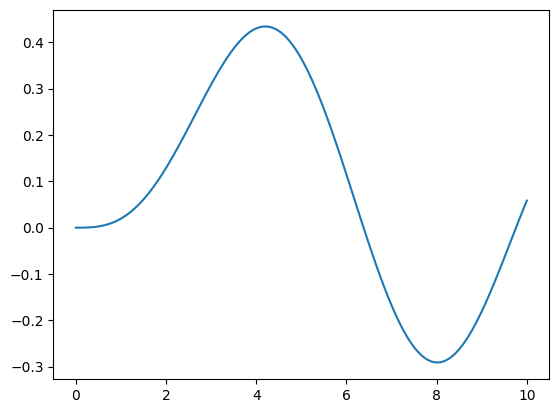

In [26]:
from scipy.special import jv
x = np.linspace(0,10,100)
plt.plot(x,jv(3,x))
plt.show()

# Differentiation


In [ ]:

from scipy.differentiate import derivative
# pindah bukan lagi scipy.misc tapi scipy.differentiate

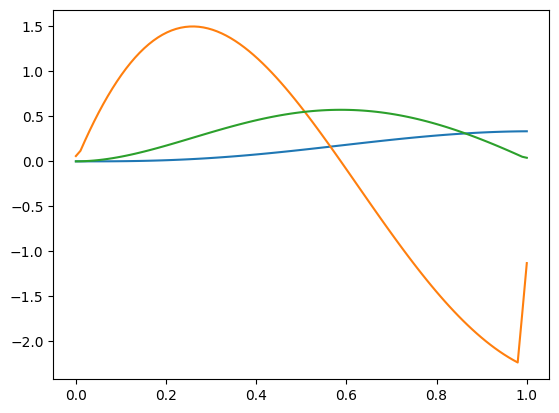

In [69]:

def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0,1,100)
dy = np.gradient(f(x),x)
dy_2 = np.gradient(dy,x)
plt.plot(x,f(x))
plt.plot(x,dy_2)
plt.plot(x,dy)
# plt.plot(x.f(x))

In [65]:
# plt.plot(x,derivative(f,x,n=2))

In [70]:
from scipy.integrate import quad

In [80]:
intergrand = lambda x:x**2 * np.sin(2*x)*np.exp(-x)
integral, integral_error = quad(intergrand,0,1)
print(f"hasil = {integral}")
print("\n")
print(f"hasil_error = {integral_error}")

hasil = 0.14558175869954834


hasil_error = 1.6162822047366225e-15


In [81]:
from scipy.integrate import dblquad
intergrand = lambda x,y: np.sin(x+y)**2
lwr_y = lambda x: -x
upr_y = lambda x:x**2
integral, integral_error = dblquad(intergrand,0,1,lwr_y,upr_y)
print(f"hasil = {integral}")
print("\n")
print(f"hasil_error = {integral_error}")

hasil = 0.3025258495666716


hasil_error = 1.3142847030165943e-14


In [82]:
from scipy.integrate import nquad

# Differeial Equation